In [1]:
import sys
!{sys.executable} -m pip install --upgrade pandas
!{sys.executable} -m pip install --upgrade google-cloud-bigquery[pandas]

'C:\Users\isabe\New' is not recognized as an internal or external command,
operable program or batch file.
'C:\Users\isabe\New' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# First we need to get the JSON key for authentication

import urllib.request

url = 'https://storage.googleapis.com/angostura-public/hult-hackathon-key.json'
urllib.request.urlretrieve(url, './hult-hackathon-key.json')

# Second, we add the key to our environment

import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = './hult-hackathon-key.json'

In [3]:
from google.cloud import bigquery

client = bigquery.Client()

In [4]:
# We can dump the BigQuery results directly into a DataFrame
QUERY = ('select * from `angostura_dev`.eh_health_survey_response')

df = client.query(QUERY).to_dataframe()

In [6]:
df.to_excel('dataset.xlsx')

In [7]:
print("Here are some quick details about the data:")
print(f">>  There are {len(df)} rows")
print(f">>  The shape of the df is {df.shape}")

Here are some quick details about the data:
>>  There are 1012 rows
>>  The shape of the df is (1012, 121)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Columns: 121 entries, timestamp to power_outage_equipment_failure
dtypes: float64(10), int64(16), object(95)
memory usage: 956.8+ KB


<b> Missing value strategy

In [9]:
import pandas as pd

df = pd.read_excel('dataset.xlsx')

In [10]:
na = df.isnull().sum()
na.to_excel('missing values.xlsx')

- The data reliability percentage is 54.5% (number of variables with missing values/number of total variables = 1-50/121)

In [11]:
# the proportion of the missing value in the whole dataset
df_na_percent = df.isnull().sum()
df_na_percent = df_na_percent/df_na_percent.sum()
df_na_percent

Unnamed: 0                                0.000000
timestamp                                 0.000000
report_week                               0.000000
operability_icu                           0.000000
power_outage_equipment_failure_specify    0.022218
                                            ...   
power_outage                              0.000000
power_outage_avg_failures_per_day         0.000000
power_outage_days_count                   0.000000
power_outage_avg_duration                 0.000000
power_outage_equipment_failure            0.000000
Length: 122, dtype: float64

In [12]:
df_na_percent.mean()

0.008196721311475409

- The average percentage of missing values is quite low, so the data quality is not too bad.

In [13]:
df_na_percent.to_excel('percentage of missing values.xlsx')

- The part above shows the percentage of missing values in each variable section.

In [14]:
# flagging missing values
file = 'dataset.xlsx'
pd.read_excel(file)

# re-reading in the dataset
df = pd.read_excel(file)

for col in df:
    
    if df[col].isnull().any() > 0:
        df['m_' + col] = df[col].isnull().astype(int)
        
# saving changes to dataset    
df.to_excel('dataset_with_flags.xlsx',
            index = False)

# reloading data
file = 'dataset_with_flags.xlsx'
pd.read_excel(file)

,Unnamed: 0,timestamp,report_week,operability_icu,power_outage_equipment_failure_specify,power_generator_available,power_outage_mortatility,power_outage_deaths_count,mortality_hospital_failure_cardiovascular_count,mortality_hospital_failure_cardiovascular_cause,...,m_rrt_staff_resident,m_rrt_staff_nurse,m_rrt_staff_nurse_nephrologist,m_nutr_operability,m_nutr_date_stopped_operability,m_nutr_reason_stopped_operability,m_nutr_num,m_nutr_daily_freq_meal,m_nutr_quality,m_nutr_freq_milk_formulas
0,0,2019-08-25T02:24:44.452Z,34 del 2019,Todos los días,NaN,Hay pero no funciona,No,0.0,2.0,"Equipos, Medicamentos, Recurso Humano, Resto e...",...,1,1,1,0,1,1,0,0,0,0
1,1,2020-01-13T19:32:06.507Z,2 del 2020,Todos los días,NaN,Funciona menos de 3 días,No,NaN,1.0,"Equipos, Medicamentos, Recurso Humano, Resto e...",...,1,1,1,0,1,1,0,0,0,0
2,2,2019-07-04T17:52:54.607Z,24 del 2019,Todos los días,NaN,Hay pero no funciona,No,0.0,1.0,"Equipos, Medicamentos, Recurso Humano, Resto e...",...,1,1,1,0,1,1,0,0,0,0
3,3,2019-10-22T15:34:36.115Z,39 del 2019,Todos los días,NaN,Funciona menos de 3 días,No,NaN,2.0,"Equipos, Medicamentos, Recurso Humano, Resto e...",...,1,1,1,0,1,1,0,0,0,0
4,4,2019-08-20T22:45:52.803Z,32 del 2019,Todos los días,NaN,Funciona todos los días,No,NaN,2.0,"Equipos, Medicamentos, Recurso Humano, Resto e...",...,1,1,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1007,2020-01-25T21:51:16.822Z,4 del 2020,Todos los días,NaN,Funciona todos los días,No,NaN,NaN,NaN,...,0,0,0,0,1,1,0,0,0,0
1008,1008,2020-01-29T02:04:57.047Z,1 del 2020,Todos los días,NaN,Funciona todos los días,No,NaN,NaN,NaN,...,0,0,0,0,1,1,0,0,0,0
1009,1009,2020-02-04T21:21:39.050Z,5 del 2020,Todos los días,NaN,Funciona todos los días,No,NaN,2.0,Medicamentos,...,0,0,0,0,1,1,0,0,0,0
1010,1010,2019-12-06T15:28:56.440Z,49 del 2019,No operativa,Rayos X,Funciona todos los días,No,0.0,0.0,NaN,...,0,0,0,0,1,1,0,0,0,0


<b>Feature Engineering

Create a dataframe which can works an index framework for different categories

In [15]:
date_split = []
for i in range(len(df)):
    date_split.append(df['report_week'][i].split(' '))
    
df['date_split'] = date_split

year = []
week_no = []
for i in range(len(df)):
    year.append(df['date_split'][i][2])
    week_no.append(df['date_split'][i][0])

df['Year'] = year
df['Week_No'] = week_no

df_sort = df.sort_values(by=['hospital_code', 'Year', 'Week_No'])

In [16]:
df_sort = df_sort.set_index([pd.Index(list(range(len(df_sort))))])

- Operability

In [17]:
df_operability = df_sort[['report_week',
                          'hospital_code',
                          'operability_icu',
                          'operability_icu_p',
                          'operability_er',
                          'operability_sx',
                          'operability_lab',
                          'operability_uls',
                          'operability_ct_mri',
                          'operability_xr',
                          'date_split',
                          'Year',
                          'Week_No']].copy()

In [18]:
df_operability.head()

,report_week,hospital_code,operability_icu,operability_icu_p,operability_er,operability_sx,operability_lab,operability_uls,operability_ct_mri,operability_xr,date_split,Year,Week_No
0,22 del 2019,AMA000,Todos los días,Nunca ha existido,Todos los días,Todos los días,Menos de 3 de días,No operativa,Nunca ha existido,No operativa,"[22, del, 2019]",2019,22
1,23 del 2019,AMA000,Todos los días,Nunca ha existido,Todos los días,Todos los días,No operativa,No operativa,Nunca ha existido,No operativa,"[23, del, 2019]",2019,23
2,24 del 2019,AMA000,Todos los días,Nunca ha existido,Todos los días,Todos los días,No operativa,No operativa,Nunca ha existido,No operativa,"[24, del, 2019]",2019,24
3,25 del 2019,AMA000,Todos los días,Nunca ha existido,Todos los días,Todos los días,No operativa,No operativa,Nunca ha existido,No operativa,"[25, del, 2019]",2019,25
4,26 del 2019,AMA000,Todos los días,Nunca ha existido,Todos los días,Todos los días,No operativa,No operativa,Nunca ha existido,No operativa,"[26, del, 2019]",2019,26


In [19]:
df_operability_new = df_sort[['report_week',
                              'hospital_code',
                              'Year',
                              'Week_No']].copy()

In [20]:
def ConvertScale(column):
    a = []
    for i in df[column]:
        if i == 'No operativa':
            a.append(0)
        elif i == 'Menos de 3 de días':
            a.append(1/3)
        elif i == 'Entre 3 y 5 días':
            a.append(2/3)
        elif i == 'Todos los días':
            a.append(1)
        else:
            a.append('x')
    
    return a

In [21]:
def NewColumn(column):
    x = column.split('_')
    k = ''
    if len(x) > 2:
        k = x[1] + '_' + x[2]
    else:
        k = x[1]    
    return k

In [22]:
df_operability_new[NewColumn('operability_icu')] = ConvertScale('operability_icu')
df_operability_new[NewColumn('operability_icu_p')] = ConvertScale('operability_icu_p')
df_operability_new[NewColumn('operability_er')] = ConvertScale('operability_er')
df_operability_new[NewColumn('operability_sx')] = ConvertScale('operability_sx')
df_operability_new[NewColumn('operability_lab')] = ConvertScale('operability_lab')
df_operability_new[NewColumn('operability_uls')] = ConvertScale('operability_uls')
df_operability_new[NewColumn('operability_ct_mri')] = ConvertScale('operability_ct_mri')
df_operability_new[NewColumn('operability_xr')] = ConvertScale('operability_xr')

In [23]:
df_operability_new.head(20)

,report_week,hospital_code,Year,Week_No,icu,icu_p,er,sx,lab,uls,ct_mri,xr
0,22 del 2019,AMA000,2019,22,1,x,1,1,0.333333,0,x,0
1,23 del 2019,AMA000,2019,23,1,x,1,1,0,0,x,0
2,24 del 2019,AMA000,2019,24,1,x,1,1,0,0,x,0
3,25 del 2019,AMA000,2019,25,1,x,1,1,0,0,x,0
4,26 del 2019,AMA000,2019,26,1,x,1,1,0.666667,0,x,0
5,27 del 2019,AMA000,2019,27,1,x,1,1,0,0,x,0
6,28 del 2019,AMA000,2019,28,1,x,1,1,0,0,x,0
7,29 del 2019,AMA000,2019,29,1,x,1,1,0,0,x,0
8,30 del 2019,AMA000,2019,30,1,x,1,1,0,0,x,0
9,31 del 2019,AMA000,2019,31,1,x,1,1,0.333333,0,x,0


In [24]:
def Remove_notavail(operability_avail):
    new_operability_avail = []
    for i in operability_avail:
        if i != 'x':
            new_operability_avail.append(i)
    
    return new_operability_avail

In [25]:
def ScarsityM(operability_avail):
    
    new_operability_avail = Remove_notavail(operability_avail)
    scar = sum(new_operability_avail)/ len(new_operability_avail)
    
    return scar

In [26]:
def ReliabilityM(operability_avail):
    
    old = len(operability_avail)
    new_operability_avail = Remove_notavail(operability_avail)
    new = len(new_operability_avail)
    
    calc = old-new
    
    rely = 1 - (calc/old)
    
    return rely

In [27]:
def ScarseOper(Hcode, operability, begin_time, end_time):
    
    per_hospital = df_operability_new.loc[df_sort['hospital_code'] == Hcode]
    start_index = per_hospital.loc[per_hospital['report_week'] == begin_time].index.values
    end_index = per_hospital.loc[per_hospital['report_week'] == end_time].index.values + 1
    operability_avail = per_hospital[operability][start_index[0]:end_index[0]]
    
    reliability = ReliabilityM(operability_avail)
    scarcity = ScarsityM(operability_avail)
    
    return (reliability, scarcity)

In [28]:
# create data-frame for test
df_try = pd.DataFrame() 
df_try['report_week'] = ['26 del 2019',
                        '27 del 2019',
                        '28 del 2019',
                        '29 del 2019',
                        '30 del 2019',
                        '31 del 2019',
                        '32 del 2019',
                        '33 del 2019',
                        '34 del 2019',
                        '35 del 2019',
                        '36 del 2019',
                        '37 del 2019',
                        '38 del 2019',
                        '39 del 2019']

df_try['hospital_code'] = ['AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000']

df_try['lab'] = [0.3,0.6,0.6,0.3,'x','x',0.3,0,0,0,'x',0.6,0.3,0]

In [29]:
df_try

,report_week,hospital_code,lab
0,26 del 2019,AMA000,0.3
1,27 del 2019,AMA000,0.6
2,28 del 2019,AMA000,0.6
3,29 del 2019,AMA000,0.3
4,30 del 2019,AMA000,x
5,31 del 2019,AMA000,x
6,32 del 2019,AMA000,0.3
7,33 del 2019,AMA000,0
8,34 del 2019,AMA000,0
9,35 del 2019,AMA000,0


In [30]:
# end_time included
begin_time = '28 del 2019'
end_time = '38 del 2019'

start_index = df_try.loc[df_try['report_week'] == begin_time].index.values
end_index = df_try.loc[df_try['report_week'] == end_time].index.values + 1
operability_avail = df_try['lab'][start_index[0]:end_index[0]]

In [31]:
type(operability_avail[4])

str

In [32]:
k = Remove_notavail(operability_avail)

In [33]:
k

[0.6, 0.3, 0.3, 0, 0, 0, 0.6, 0.3]

In [34]:
len([9])

1

In [35]:
# pick a specific Hospital, operability and a window of inspection --- both dates inclusive
k, l = ScarseOper('AMA000', 'lab', '31 del 2019', '34 del 2019')
k1, l1 = ScarseOper('AMA000', 'lab', '31 del 2019', '31 del 2019')

In [36]:
print(k) # relyability
print(l) # scarcity

1.0
0.16666666666666666


In [37]:
print(k1) # relyability
print(l1) # scarcity

1.0
0.3333333333333333


- Emergency Supplies (Medicines)

In [38]:
df_medicine = df_sort[['report_week',
                      'hospital_code',
                      'er_avail_adrenalin',
                      'er_avail_atropine',
                      'er_avail_dopamine',
                      'er_avail_cephalosporins_betalactams',
                      'er_avail_aminoglycosides_quinolone',
                      'er_avail_vancomycin_clindamycin',
                      'er_avail_lidocaine',
                      'er_avail_minor_opioids',
                      'er_avail_major_opioids',
                      'er_avail_iv_fluids',
                      'er_avail_diazepam_dph',
                      'er_avail_heparin',
                      'er_avail_steroids',
                      'er_avail_insulin',
                      'er_avail_asthma',
                      'er_avail_blood_pressure',
                      'er_avail_defibrillator',
                      'er_avail_ott_intubation',
                      'er_avail_catheter',
                      'er_avail_oxygen_suction',
                      'date_split',
                      'Year',
                      'Week_No']].copy()

In [39]:
df_medicine.head()

,report_week,hospital_code,er_avail_adrenalin,er_avail_atropine,er_avail_dopamine,er_avail_cephalosporins_betalactams,er_avail_aminoglycosides_quinolone,er_avail_vancomycin_clindamycin,er_avail_lidocaine,er_avail_minor_opioids,...,er_avail_insulin,er_avail_asthma,er_avail_blood_pressure,er_avail_defibrillator,er_avail_ott_intubation,er_avail_catheter,er_avail_oxygen_suction,date_split,Year,Week_No
0,22 del 2019,AMA000,No hubo,No hubo,No hubo,Entre 3 y 5 días,No hubo,No hubo,Todos los días,Entre 1 y 2 días,...,No hubo,Entre 3 y 5 días,Entre 1 y 2 días,Todos los días,Todos los días,No hubo,Entre 3 y 5 días,"[22, del, 2019]",2019,22
1,23 del 2019,AMA000,No hubo,No hubo,No hubo,No hubo,No hubo,No hubo,Todos los días,Entre 1 y 2 días,...,No hubo,Entre 3 y 5 días,No hubo,Todos los días,Todos los días,No hubo,Entre 1 y 2 días,"[23, del, 2019]",2019,23
2,24 del 2019,AMA000,No hubo,No hubo,No hubo,No hubo,No hubo,No hubo,Todos los días,No hubo,...,Entre 1 y 2 días,Entre 3 y 5 días,No hubo,No hubo,No hubo,No hubo,Entre 1 y 2 días,"[24, del, 2019]",2019,24
3,25 del 2019,AMA000,Entre 1 y 2 días,No hubo,No hubo,Entre 1 y 2 días,No hubo,No hubo,Todos los días,No hubo,...,No hubo,Entre 1 y 2 días,No hubo,No hubo,No hubo,No hubo,Entre 3 y 5 días,"[25, del, 2019]",2019,25
4,26 del 2019,AMA000,No hubo,No hubo,No hubo,Entre 1 y 2 días,No hubo,No hubo,Todos los días,No hubo,...,Entre 1 y 2 días,No hubo,No hubo,No hubo,No hubo,No hubo,Entre 3 y 5 días,"[26, del, 2019]",2019,26


In [40]:
df_medicine_new = df_sort[['report_week',
                           'hospital_code',
                           'Year',
                           'Week_No']].copy()

In [41]:
def ConvertScale(column):
    a = []
    for i in df[column]:
        if i == 'No hubo':
            a.append(0)
        elif i == 'Entre 1 y 2 días':
            a.append(1/3)
        elif i == 'Entre 3 y 5 días':
            a.append(2/3)
        elif i == 'Todos los días':
            a.append(1)
        else:
            a.append('x')
    
    return a

In [42]:
def NewColumn(column):
    x = column.split('_')
    k = ''
    if len(x) > 3:
        k = x[2] + '_' + x[3]
    else:
        k = x[2]    
    return k

In [43]:
df_medicine_new[NewColumn('er_avail_adrenalin')] = ConvertScale('er_avail_adrenalin')
df_medicine_new[NewColumn('er_avail_atropine')] = ConvertScale('er_avail_atropine')
df_medicine_new[NewColumn('er_avail_dopamine')] = ConvertScale('er_avail_dopamine')
df_medicine_new[NewColumn('er_avail_cephalosporins_betalactams')] = ConvertScale('er_avail_cephalosporins_betalactams')
df_medicine_new[NewColumn('er_avail_aminoglycosides_quinolone')] = ConvertScale('er_avail_aminoglycosides_quinolone')
df_medicine_new[NewColumn('er_avail_vancomycin_clindamycin')] = ConvertScale('er_avail_vancomycin_clindamycin')
df_medicine_new[NewColumn('er_avail_lidocaine')] = ConvertScale('er_avail_lidocaine')
df_medicine_new[NewColumn('er_avail_minor_opioids')] = ConvertScale('er_avail_minor_opioids')
df_medicine_new[NewColumn('er_avail_major_opioids')] = ConvertScale('er_avail_major_opioids')
df_medicine_new[NewColumn('er_avail_iv_fluids')] = ConvertScale('er_avail_iv_fluids')
df_medicine_new[NewColumn('er_avail_diazepam_dph')] = ConvertScale('er_avail_diazepam_dph')
df_medicine_new[NewColumn('er_avail_heparin')] = ConvertScale('er_avail_heparin')
df_medicine_new[NewColumn('er_avail_steroids')] = ConvertScale('er_avail_steroids')
df_medicine_new[NewColumn('er_avail_insulin')] = ConvertScale('er_avail_insulin')
df_medicine_new[NewColumn('er_avail_asthma')] = ConvertScale('er_avail_asthma')
df_medicine_new[NewColumn('er_avail_blood_pressure')] = ConvertScale('er_avail_blood_pressure')
df_medicine_new[NewColumn('er_avail_defibrillator')] = ConvertScale('er_avail_defibrillator')
df_medicine_new[NewColumn('er_avail_ott_intubation')] = ConvertScale('er_avail_ott_intubation')
df_medicine_new[NewColumn('er_avail_catheter')] = ConvertScale('er_avail_catheter')
df_medicine_new[NewColumn('er_avail_oxygen_suction')] = ConvertScale('er_avail_oxygen_suction')

In [44]:
df_medicine_new.head(20)

,report_week,hospital_code,Year,Week_No,adrenalin,atropine,dopamine,cephalosporins_betalactams,aminoglycosides_quinolone,vancomycin_clindamycin,...,diazepam_dph,heparin,steroids,insulin,asthma,blood_pressure,defibrillator,ott_intubation,catheter,oxygen_suction
0,22 del 2019,AMA000,2019,22,0,0.000000,0.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
1,23 del 2019,AMA000,2019,23,0,0.000000,0.0,0.666667,0,0,...,0,0.666667,0,0,0,0,0,1,0,0.666667
2,24 del 2019,AMA000,2019,24,0,0.000000,0.0,0.000000,0,0,...,0,0,0,0.333333,0.666667,0,0,0,0,0.333333
3,25 del 2019,AMA000,2019,25,0,0.000000,0.0,0.000000,0,0,...,0,0,0,0,0,0.333333,0,0,0,0
4,26 del 2019,AMA000,2019,26,0,0.000000,0.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0.333333
5,27 del 2019,AMA000,2019,27,0,0.000000,0.0,0.000000,0,0,...,0,0.666667,0,0,0,0.666667,0,0,0,0.333333
6,28 del 2019,AMA000,2019,28,0.333333,0.666667,0.0,0.333333,0,0,...,0,0.666667,0,0,0.333333,0,0,0,0,0.666667
7,29 del 2019,AMA000,2019,29,0,0.000000,0.0,0.000000,0,0,...,0,0.333333,0,1,0,0,0,0,0,0
8,30 del 2019,AMA000,2019,30,0,0.000000,0.0,0.000000,0,0,...,0,0,0,0,0,0.666667,0,0,0,0.333333
9,31 del 2019,AMA000,2019,31,0,0.000000,0.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0.333333


In [45]:
def Remove_notavail(drug_avail):
    new_drug_avail = []
    for i in drug_avail:
        if i != 'x':
            new_drug_avail.append(i)
    
    return new_drug_avail

In [46]:
def ScarsityM(drug_avail):
    
    new_drug_avail = Remove_notavail(drug_avail)
    scar = sum(new_drug_avail)/ len(new_drug_avail)
    
    return scar

In [47]:
def ReliabilityM(drug_avail):
    
    old = len(drug_avail)
    new_drug_avail = Remove_notavail(drug_avail)
    new = len(new_drug_avail)
    
    calc = old-new
    
    rely = 1 - (calc/old)
    
    return rely

In [48]:
def ScarseDrug(Hcode, drug, begin_time, end_time):
    
    per_hospital = df_medicine_new.loc[df_sort['hospital_code'] == Hcode]
    start_index = per_hospital.loc[per_hospital['report_week'] == begin_time].index.values
    end_index = per_hospital.loc[per_hospital['report_week'] == end_time].index.values + 1
    drug_avail = per_hospital[drug][start_index[0]:end_index[0]]
    
    reliability = ReliabilityM(drug_avail)
    scarcity = ScarsityM(drug_avail)
    
    return (reliability, scarcity)

In [49]:
# create data-frame for test
df_try = pd.DataFrame() 
df_try['report_week'] = ['26 del 2019',
                        '27 del 2019',
                        '28 del 2019',
                        '29 del 2019',
                        '30 del 2019',
                        '31 del 2019',
                        '32 del 2019',
                        '33 del 2019',
                        '34 del 2019',
                        '35 del 2019',
                        '36 del 2019',
                        '37 del 2019',
                        '38 del 2019',
                        '39 del 2019']

df_try['hospital_code'] = ['AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000']

df_try['cephalosporins_betalactams'] = [0.3,0.6,0.6,0.3,'x','x',0.3,0,0,0,'x',0.6,0.3,0]

In [50]:
df_try

,report_week,hospital_code,cephalosporins_betalactams
0,26 del 2019,AMA000,0.3
1,27 del 2019,AMA000,0.6
2,28 del 2019,AMA000,0.6
3,29 del 2019,AMA000,0.3
4,30 del 2019,AMA000,x
5,31 del 2019,AMA000,x
6,32 del 2019,AMA000,0.3
7,33 del 2019,AMA000,0
8,34 del 2019,AMA000,0
9,35 del 2019,AMA000,0


In [51]:
# end_time included
begin_time = '28 del 2019'
end_time = '38 del 2019'

start_index = df_try.loc[df_try['report_week'] == begin_time].index.values
end_index = df_try.loc[df_try['report_week'] == end_time].index.values + 1
drug_avail = df_try['cephalosporins_betalactams'][start_index[0]:end_index[0]]

In [52]:
type(drug_avail[4])

str

In [53]:
k = Remove_notavail(drug_avail)

In [54]:
k

[0.6, 0.3, 0.3, 0, 0, 0, 0.6, 0.3]

In [55]:
len([9])

1

In [56]:
# pick a specific Hospital, drug and a window of inspection --- both dates inclusive
k, l = ScarseDrug('AMA000', 'cephalosporins_betalactams', '28 del 2019', '38 del 2019')
k1, l1 = ScarseDrug('AMA000', 'cephalosporins_betalactams', '28 del 2019', '28 del 2019')

In [57]:
print(k) # relyability
print(l) # scarcity

1.0
0.1818181818181818


In [58]:
print(k1) # relyability
print(l1) # scarcity

1.0
0.3333333333333333


- Surgical Supplies

In [59]:
df_surgical = df_sort[['report_week',
                      'hospital_code',
                      'sx_avail_minor_opioids',
                      'sx_avail_major_opioids',
                      'sx_avail_anesthetic_gases',
                      'sx_avail_anesthetics_iv',
                      'sx_avail_relaxants',
                      'sx_avail_ott_intubation',
                      'sx_avail_patient_lingerie_kit',
                      'sx_avail_disposables_mask_gloves_gown',
                      'sx_avail_oxygen_suction',
                      'date_split',
                      'Year',
                      'Week_No']].copy()

In [60]:
df_surgical.head()

,report_week,hospital_code,sx_avail_minor_opioids,sx_avail_major_opioids,sx_avail_anesthetic_gases,sx_avail_anesthetics_iv,sx_avail_relaxants,sx_avail_ott_intubation,sx_avail_patient_lingerie_kit,sx_avail_disposables_mask_gloves_gown,sx_avail_oxygen_suction,date_split,Year,Week_No
0,22 del 2019,AMA000,Entre 3 y 5 días,No hubo,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,"[22, del, 2019]",2019,22
1,23 del 2019,AMA000,Entre 3 y 5 días,No hubo,Todos los días,Todos los días,Todos los días,Todos los días,No hubo,No hubo,Entre 3 y 5 días,"[23, del, 2019]",2019,23
2,24 del 2019,AMA000,No hubo,No hubo,Todos los días,Todos los días,Todos los días,Todos los días,Entre 3 y 5 días,No hubo,Todos los días,"[24, del, 2019]",2019,24
3,25 del 2019,AMA000,No hubo,No hubo,Todos los días,Todos los días,Entre 3 y 5 días,Todos los días,No hubo,No hubo,Todos los días,"[25, del, 2019]",2019,25
4,26 del 2019,AMA000,No hubo,No hubo,Todos los días,Todos los días,Todos los días,Todos los días,No hubo,No hubo,Todos los días,"[26, del, 2019]",2019,26


In [61]:
df_surgical_new = df_sort[['report_week',
                           'hospital_code',
                           'Year',
                           'Week_No']].copy()

In [62]:
def ConvertScale(column):
    a = []
    for i in df[column]:
        if i == 'No hubo':
            a.append(0)
        elif i == 'Entre 1 y 2 días':
            a.append(1/3)
        elif i == 'Entre 3 y 5 días':
            a.append(2/3)
        elif i == 'Todos los días':
            a.append(1)
        else:
            a.append('x')
    
    return a

In [63]:
def NewColumn(column):
    x = column.split('_')
    k = ''
    if len(x) > 3:
        k = x[2] + '_' + x[3]
    else:
        k = x[2]    
    return k

In [64]:
df_surgical_new[NewColumn('sx_avail_minor_opioids')] = ConvertScale('sx_avail_minor_opioids')
df_surgical_new[NewColumn('sx_avail_major_opioids')] = ConvertScale('sx_avail_major_opioids')
df_surgical_new[NewColumn('sx_avail_anesthetic_gases')] = ConvertScale('sx_avail_anesthetic_gases')
df_surgical_new[NewColumn('sx_avail_anesthetics_iv')] = ConvertScale('sx_avail_anesthetics_iv')
df_surgical_new[NewColumn('sx_avail_relaxants')] = ConvertScale('sx_avail_relaxants')
df_surgical_new[NewColumn('sx_avail_ott_intubation')] = ConvertScale('sx_avail_ott_intubation')
df_surgical_new[NewColumn('sx_avail_patient_lingerie_kit')] = ConvertScale('sx_avail_patient_lingerie_kit')
df_surgical_new[NewColumn('sx_avail_disposables_mask_gloves_gown')] = ConvertScale('sx_avail_disposables_mask_gloves_gown')
df_surgical_new[NewColumn('sx_avail_oxygen_suction')] = ConvertScale('sx_avail_oxygen_suction')

In [65]:
df_surgical_new.head(20)

,report_week,hospital_code,Year,Week_No,minor_opioids,major_opioids,anesthetic_gases,anesthetics_iv,relaxants,ott_intubation,patient_lingerie,disposables_mask,oxygen_suction
0,22 del 2019,AMA000,2019,22,0.000000,0,1.000000,1.000000,1,1,1,0,1.000000
1,23 del 2019,AMA000,2019,23,0.000000,0,1.000000,1.000000,1,1,0,0,1.000000
2,24 del 2019,AMA000,2019,24,0.000000,0,1.000000,1.000000,1,1,0.666667,0,1.000000
3,25 del 2019,AMA000,2019,25,0.000000,0,1.000000,1.000000,1,1,0.333333,0,1.000000
4,26 del 2019,AMA000,2019,26,0.000000,0,1.000000,1.000000,1,1,0.333333,0.666667,1.000000
5,27 del 2019,AMA000,2019,27,0.000000,0,1.000000,1.000000,1,1,0,0.666667,1.000000
6,28 del 2019,AMA000,2019,28,0.333333,0,1.000000,1.000000,1,1,1,0,1.000000
7,29 del 2019,AMA000,2019,29,0.000000,0,1.000000,1.000000,1,1,1,0,1.000000
8,30 del 2019,AMA000,2019,30,0.000000,0,1.000000,1.000000,1,1,0,0.333333,1.000000
9,31 del 2019,AMA000,2019,31,0.333333,0,1.000000,1.000000,1,1,0.666667,0.666667,1.000000


In [66]:
def Remove_notavail(surgical_avail):
    new_surgical_avail = []
    for i in surgical_avail:
        if i != 'x':
            new_surgical_avail.append(i)
    
    return new_surgical_avail

In [67]:
def ScarsityM(surgical_avail):
    
    new_surgical_avail = Remove_notavail(surgical_avail)
    scar = sum(new_surgical_avail)/ len(new_surgical_avail)
    
    return scar

In [68]:
def ReliabilityM(surgical_avail):
    
    old = len(surgical_avail)
    new_surgical_avail = Remove_notavail(surgical_avail)
    new = len(new_surgical_avail)
    
    calc = old-new
    
    rely = 1 - (calc/old)
    
    return rely

In [79]:
def ScarseSurg(Hcode, surgical, begin_time, end_time):
    
    per_hospital = df_surgical_new.loc[df_sort['hospital_code'] == Hcode]
    start_index = per_hospital.loc[per_hospital['report_week'] == begin_time].index.values
    end_index = per_hospital.loc[per_hospital['report_week'] == end_time].index.values + 1
    surgical_avail = per_hospital[surgical][start_index[0]:end_index[0]]
    
    reliability = ReliabilityM(surgical_avail)
    scarcity = ScarsityM(surgical_avail)
    
    return (reliability, scarcity)

In [80]:
# create data-frame for test
df_try = pd.DataFrame() 
df_try['report_week'] = ['26 del 2019',
                        '27 del 2019',
                        '28 del 2019',
                        '29 del 2019',
                        '30 del 2019',
                        '31 del 2019',
                        '32 del 2019',
                        '33 del 2019',
                        '34 del 2019',
                        '35 del 2019',
                        '36 del 2019',
                        '37 del 2019',
                        '38 del 2019',
                        '39 del 2019']

df_try['hospital_code'] = ['AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000',
                        'AMA000']

df_try['patient_lingerie'] = [0.3,0.6,0.6,0.3,'x','x',0.3,0,0,0,'x',0.6,0.3,0]

In [81]:
df_try

,report_week,hospital_code,patient_lingerie
0,26 del 2019,AMA000,0.3
1,27 del 2019,AMA000,0.6
2,28 del 2019,AMA000,0.6
3,29 del 2019,AMA000,0.3
4,30 del 2019,AMA000,x
5,31 del 2019,AMA000,x
6,32 del 2019,AMA000,0.3
7,33 del 2019,AMA000,0
8,34 del 2019,AMA000,0
9,35 del 2019,AMA000,0


In [82]:
# end_time included
begin_time = '28 del 2019'
end_time = '38 del 2019'

start_index = df_try.loc[df_try['report_week'] == begin_time].index.values
end_index = df_try.loc[df_try['report_week'] == end_time].index.values + 1
surgical_avail = df_try['patient_lingerie'][start_index[0]:end_index[0]]

In [83]:
type(surgical_avail[4])

str

In [84]:
k = Remove_notavail(surgical_avail)

In [85]:
k

[0.6, 0.3, 0.3, 0, 0, 0, 0.6, 0.3]

In [86]:
len([9])

1

In [87]:
# pick a specific Hospital, drug and a window of inspection --- both dates inclusive
k, l = ScarseDrug('AMA000', 'patient_lingerie', '28 del 2019', '38 del 2019')
k1, l1 = ScarseDrug('AMA000', 'patient_lingerie', '28 del 2019', '28 del 2019')

KeyError: 'patient_lingerie'

In [ ]:
print(k) # relyability
print(l) # scarcity

In [ ]:
print(k1) # relyability
print(l1) # scarcity

In [ ]:
df.to_excel('improved dataset.xlsx')

In [ ]:
df = pd.read_excel('improved dataset.xlsx')
df

<b>Correlation

In [88]:
df_corr = df.corr().round(2)
df_corr.to_excel('Correlation between different variables.xlsx')

In [89]:
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # more data visualization

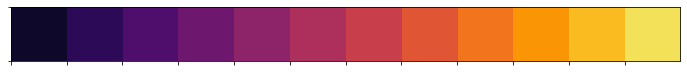

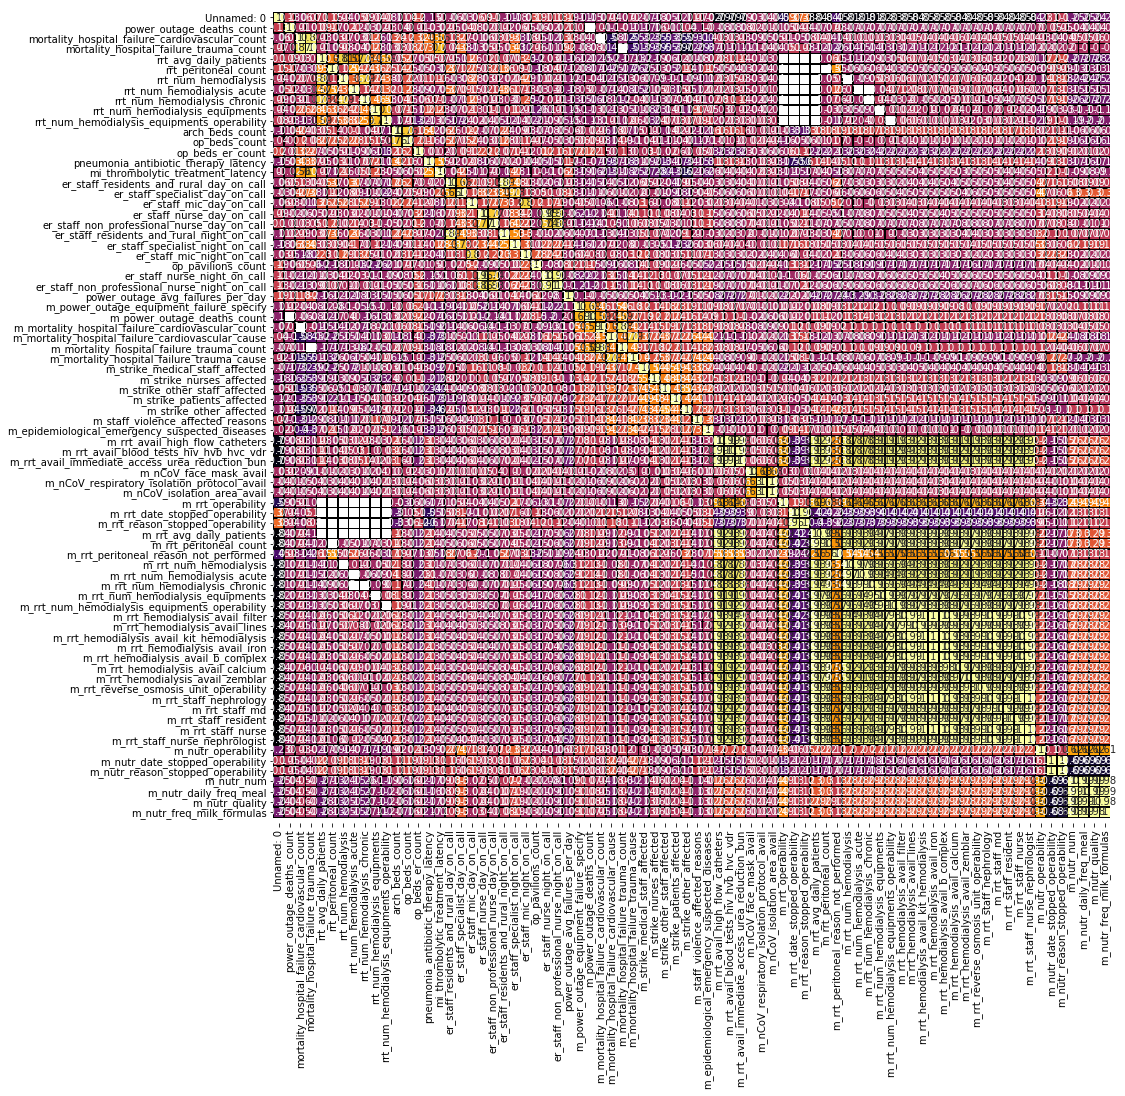

In [90]:
# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Correlation Heatmap.png')
plt.show()

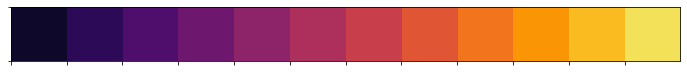

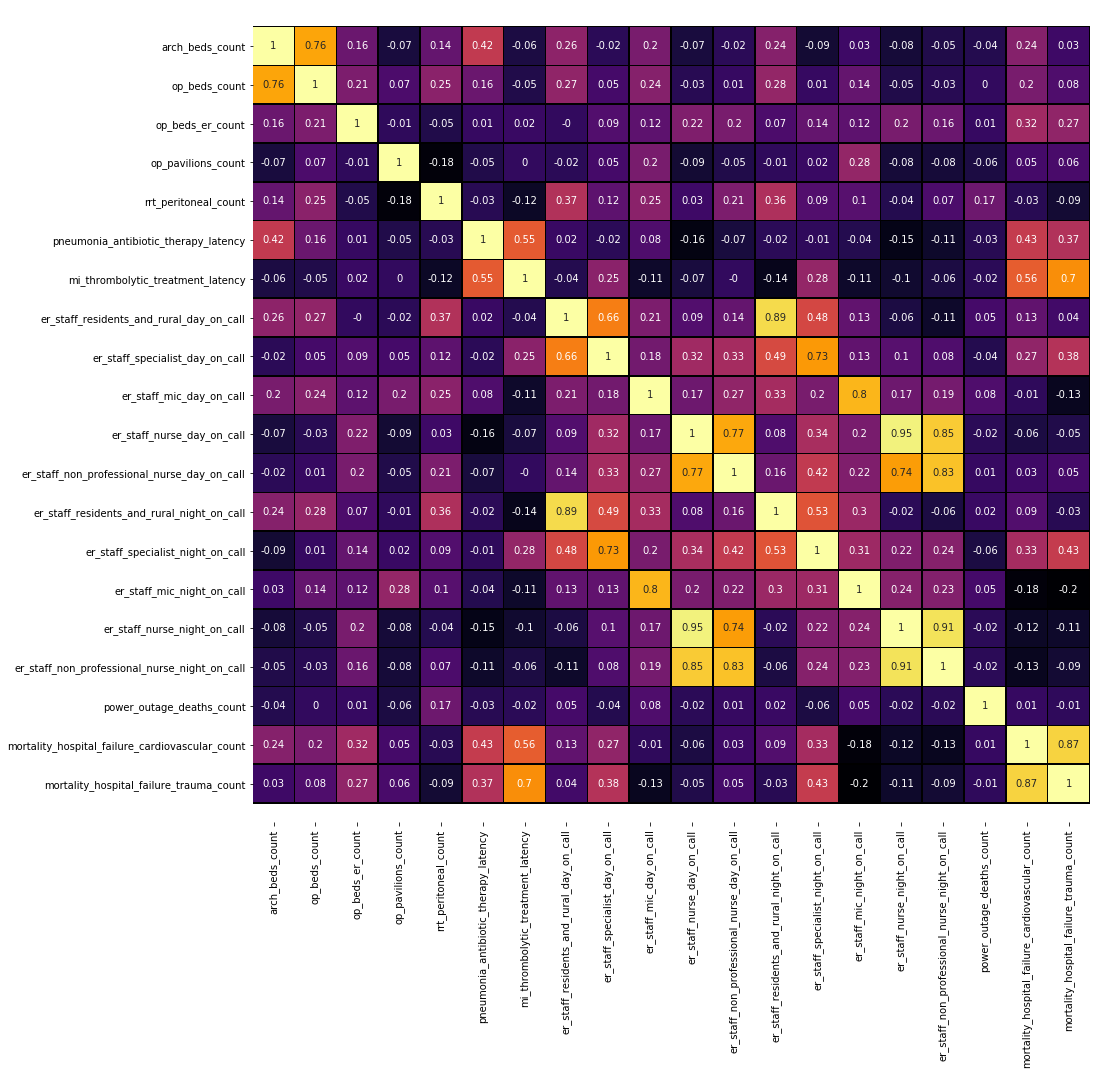

In [91]:
df_1 = df[['arch_beds_count', 
           'op_beds_count', 
           'op_beds_er_count',
           'op_pavilions_count', 
           'rrt_peritoneal_count', 
           'pneumonia_antibiotic_therapy_latency', 
           'mi_thrombolytic_treatment_latency',
           'er_staff_residents_and_rural_day_on_call',
           'er_staff_specialist_day_on_call',
           'er_staff_mic_day_on_call',
           'er_staff_nurse_day_on_call',
           'er_staff_non_professional_nurse_day_on_call',
           'er_staff_residents_and_rural_night_on_call',
           'er_staff_specialist_night_on_call',
           'er_staff_mic_night_on_call',
           'er_staff_nurse_night_on_call', 
           'er_staff_non_professional_nurse_night_on_call',
           'power_outage_days_count',
           'power_outage_deaths_count',
           'mortality_hospital_failure_cardiovascular_count',
           'mortality_hospital_failure_trauma_count']]
df_corr = df_1.corr().round(2)

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size+
fig, ax = plt.subplots(figsize=(15, 15))


# creating a heatmap
sns.heatmap(df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Correlation Heatmap.png')
plt.show()

In [99]:
# Correlation with output variable
cor_target_1 = abs(df_corr["mortality_hospital_failure_cardiovascular_count"])
#Selecting highly correlated features
relevant_features_1 = cor_target_1[cor_target_1 > 0.3]
relevant_features_1

op_beds_er_count                                   0.32
pneumonia_antibiotic_therapy_latency               0.43
mi_thrombolytic_treatment_latency                  0.56
er_staff_specialist_night_on_call                  0.33
mortality_hospital_failure_cardiovascular_count    1.00
mortality_hospital_failure_trauma_count            0.87
Name: mortality_hospital_failure_cardiovascular_count, dtype: float64

In [100]:
# Correlation with output variable
cor_target_2 = abs(df_corr["mortality_hospital_failure_trauma_count"])
#Selecting highly correlated features
relevant_features_2 = cor_target_2[cor_target_2 > 0.3]
relevant_features_2

pneumonia_antibiotic_therapy_latency               0.37
mi_thrombolytic_treatment_latency                  0.70
er_staff_specialist_day_on_call                    0.38
er_staff_specialist_night_on_call                  0.43
mortality_hospital_failure_cardiovascular_count    0.87
mortality_hospital_failure_trauma_count            1.00
Name: mortality_hospital_failure_trauma_count, dtype: float64

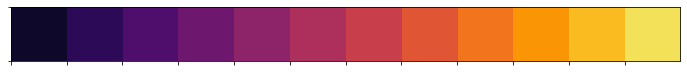

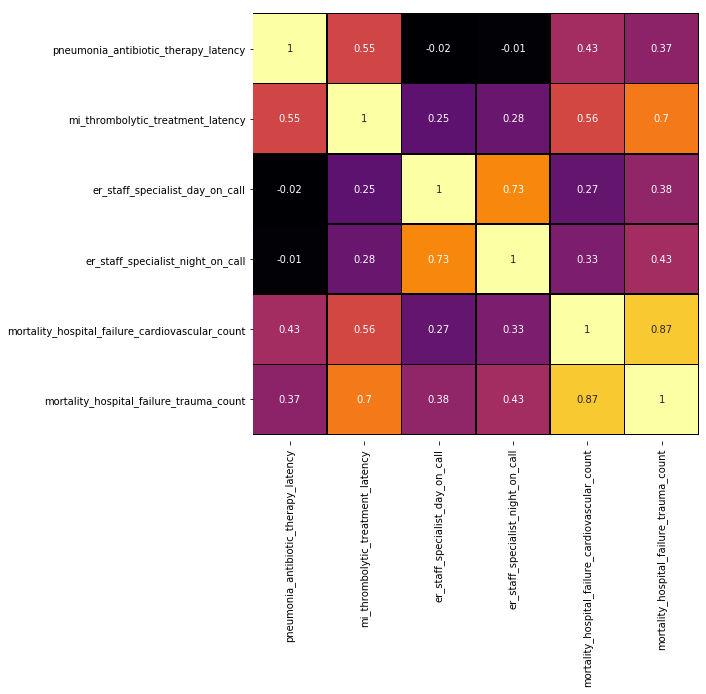

In [101]:
df_2 = df[['pneumonia_antibiotic_therapy_latency', 
           'mi_thrombolytic_treatment_latency',
           'er_staff_specialist_day_on_call',
           'er_staff_specialist_night_on_call',
           'mortality_hospital_failure_cardiovascular_count',
           'mortality_hospital_failure_trauma_count']]
df_corr_t1 = df_2.corr().round(2)

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size+
fig, ax = plt.subplots(figsize=(8, 8))


# creating a heatmap
sns.heatmap(df_corr_t1,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.1            # add 0.1 to the bottom
top -= 0.1               # subtract 0.1 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Correlation Heatmap.png')
plt.show()

In [102]:
import plotly
plotly.__version__

'4.5.0'

In [110]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [113]:
import seaborn as sns
dataset = sns.load_dataset('dataset')
dataset.head()

HTTPError: HTTP Error 404: Not Found